In [14]:
import sys,time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# The number of representative points
numRepPoints = 5
# Shrink factor
alpha = 0.2
# Desired cluster number
numDesCluster = 10

In [16]:
data_set = pd.read_csv('clusteredTags.csv')
data_set = data_set.transpose()

In [17]:
data = data_set.iloc[1:,:]
data

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
3,0.065167,0.055521,0.100484,0.097088,0.021125,0.099750,0.088833,0.121816,0.106000,0.103750,...,0.12400,0.09200,0.01250,0.04575,0.03875,0.056937,0.021625,0.06850,0.45225,0.12225
6,0.104167,0.052636,0.702141,0.241284,0.043750,0.149875,0.046167,0.445443,0.044375,0.346500,...,0.26400,0.10575,0.01125,0.21775,0.05675,0.106437,0.016125,0.05500,0.44325,0.07200
7,0.051833,0.049479,0.056016,0.075824,0.014750,0.112000,0.072833,0.115820,0.107875,0.092125,...,0.19975,0.29475,0.02775,0.03250,0.02175,0.093062,0.029250,0.15625,0.45850,0.06150
10,0.055167,0.138771,0.089422,0.094534,0.037875,0.158625,0.121583,0.132531,0.084000,0.150125,...,0.15200,0.05175,0.02850,0.06375,0.12850,0.202250,0.055000,0.05450,0.34700,0.06150
11,0.049250,0.057050,0.059047,0.109047,0.015250,0.185750,0.072833,0.132289,0.028000,0.082500,...,0.15150,0.28050,0.03475,0.18625,0.01800,0.116562,0.032875,0.08075,0.69450,0.05325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7361,0.091833,0.224250,0.104844,0.697541,0.174750,0.138375,0.114917,0.521311,0.254125,0.177750,...,0.27375,0.06425,0.00950,0.05325,0.10050,0.149312,0.008125,0.06800,0.39675,0.06350
7438,0.125333,0.081386,0.441922,0.380480,0.059000,0.110500,0.053750,0.458105,0.048625,0.286000,...,0.20475,0.03625,0.01550,0.06175,0.06300,0.112875,0.009500,0.03525,0.46250,0.11050
8636,0.071917,0.206593,0.086469,0.127716,0.031625,0.093750,0.289000,0.195237,0.302250,0.187375,...,0.06875,0.08275,0.01050,0.04800,0.38600,0.091250,0.043750,0.06600,0.44575,0.05225
58559,0.116583,0.183107,0.333656,0.358547,0.104250,0.158250,0.073417,0.460333,0.164750,0.227375,...,0.22175,0.16225,0.01825,0.07175,0.21725,0.165437,0.016250,0.09800,0.45775,0.05450


In [18]:
def runCURE(data, numRepPoints, alpha, numDesCluster):

    # Initialization
    Clusters = []
    numCluster = len(data)
    numPts = len(data)
    distCluster = np.ones([len(data), len(data)])
    distCluster = distCluster * float('inf')
    for idPoint in range(len(data)):
        newClust = CureCluster(idPoint, data[idPoint,:])
        Clusters.append(newClust)
    for row in range(0, numPts):
    	for col in range(0, row):
    		distCluster[row][col] = dist(Clusters[row].center, Clusters[col].center)
    while numCluster > numDesCluster:
        if np.mod(numCluster, 50) == 0:
            a = 1
            #print('Cluster count:', numCluster)

        # Find a pair of closet clusters
        minIndex = np.where(distCluster == np.min(distCluster))
        minIndex1 = minIndex[0][0]
        minIndex2 = minIndex[1][0]

        # Merge
        Clusters[minIndex1].mergeWithCluster(Clusters[minIndex2], numRepPoints, alpha)
        # Update the distCluster matrix
        for i in range(0, minIndex1):
            distCluster[minIndex1, i] = Clusters[minIndex1].distRep(Clusters[i])
        for i in range(minIndex1+1, numCluster):
            distCluster[i, minIndex1] = Clusters[minIndex1].distRep(Clusters[i])
        # Delete the merged cluster and its disCluster vector.
        distCluster = np.delete(distCluster, minIndex2, axis=0)
        distCluster = np.delete(distCluster, minIndex2, axis=1)
        del Clusters[minIndex2]
        numCluster = numCluster - 1

    print('Cluster count:', numCluster)
    # Generate sample labels
    Label = [0] * numPts
    for i in range(0, len(Clusters)):
        for j in range(0, len(Clusters[i].index)):
            Label[Clusters[i].index[j]] = i + 1

    return Label

In [6]:
! pip install -U scikit-learn scipy matplotlib

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'd:\\anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:


In [7]:
import sklearn.metrics as metrics
from CURE import *

In [8]:
maxi = 0
max_clusters = 0
for i in range(3, 17):
    Label_pre = runCURE(data.to_numpy(), numRepPoints, alpha, i)
    sil_score = metrics.silhouette_score(data, Label_pre, metric = "euclidean")
    if sil_score > maxi:
        maxi = sil_score
        max_clusters = i
    print("The silhouette score for "+ str(i) + "Clusters is : " + str(sil_score))



Cluster count: 3
The silhouette score for 3Clusters is : 0.04124327818855438
Cluster count: 4
The silhouette score for 4Clusters is : 0.036120606887136524
Cluster count: 5
The silhouette score for 5Clusters is : 0.04447189535856602
Cluster count: 6
The silhouette score for 6Clusters is : 0.04248105140892081
Cluster count: 7
The silhouette score for 7Clusters is : 0.03962465513132091
Cluster count: 8
The silhouette score for 8Clusters is : 0.036229636963518275
Cluster count: 9
The silhouette score for 9Clusters is : 0.0338528122403395
Cluster count: 10
The silhouette score for 10Clusters is : 0.037328737111281304
Cluster count: 11
The silhouette score for 11Clusters is : 0.0400451143321764
Cluster count: 12
The silhouette score for 12Clusters is : 0.048085446030167144
Cluster count: 13
The silhouette score for 13Clusters is : 0.048289348466200456
Cluster count: 14
The silhouette score for 14Clusters is : 0.047790739717530964
Cluster count: 15
The silhouette score for 15Clusters is : 0.0

In [9]:

start = time.process_time()
print("Please wait for CURE clustering to complete...")
Label_pre = runCURE(data.to_numpy(), numRepPoints, alpha, max_clusters)
print("The CURE clustering is completed!!\n")
end = time.process_time()


Please wait for CURE clustering to complete...
Cluster count: 15
The CURE clustering is completed!!



In [10]:
print(Label_pre)

[14, 12, 14, 4, 3, 12, 3, 4, 12, 12, 9, 15, 1, 5, 11, 12, 14, 14, 12, 14, 9, 8, 14, 14, 6, 14, 14, 6, 14, 12, 6, 4, 4, 15, 8, 12, 6, 12, 1, 9, 14, 9, 4, 4, 3, 4, 4, 6, 6, 14, 3, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 3, 14, 6, 6, 6, 14, 1, 14, 3, 9, 15, 12, 12, 14, 14, 3, 15, 14, 15, 3, 6, 14, 3, 14, 14, 8, 12, 14, 14, 14, 6, 12, 12, 15, 4, 9, 4, 14, 12, 15, 4, 4, 12, 8, 3, 15, 14, 9, 4, 4, 2, 13, 2, 9, 8, 4, 8, 2, 12, 9, 15, 6, 12, 8, 12, 12, 11, 14, 8, 12, 12, 8, 6, 12, 8, 4, 14, 4, 2, 7, 12, 3, 4, 9, 1, 10, 8, 12, 4, 9, 14, 14, 14, 9, 9, 11, 6, 3, 9, 12, 14, 9, 1, 3, 10, 1, 14, 4, 1, 5, 14, 12, 8, 14, 2, 15, 15, 4, 8, 4, 6, 15, 3, 15, 12, 8, 14, 4, 14, 15, 6, 4, 15, 14, 5, 8, 14, 15, 12, 15, 6, 7, 8, 8, 14, 12, 13, 12, 9, 10, 12, 11, 15, 15, 15, 15, 13, 14, 15, 13, 13, 13, 12, 13, 14, 14, 15]


In [11]:
df = data
df['Clusters'] = Label_pre
df

C:\Users\ANUVIK~1\AppData\Local\Temp/ipykernel_17652/790343681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters'] = Label_pre


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Clusters
3,0.065167,0.055521,0.100484,0.097088,0.021125,0.099750,0.088833,0.121816,0.106000,0.103750,...,0.09200,0.01250,0.04575,0.03875,0.056937,0.021625,0.06850,0.45225,0.12225,14
6,0.104167,0.052636,0.702141,0.241284,0.043750,0.149875,0.046167,0.445443,0.044375,0.346500,...,0.10575,0.01125,0.21775,0.05675,0.106437,0.016125,0.05500,0.44325,0.07200,12
7,0.051833,0.049479,0.056016,0.075824,0.014750,0.112000,0.072833,0.115820,0.107875,0.092125,...,0.29475,0.02775,0.03250,0.02175,0.093062,0.029250,0.15625,0.45850,0.06150,14
10,0.055167,0.138771,0.089422,0.094534,0.037875,0.158625,0.121583,0.132531,0.084000,0.150125,...,0.05175,0.02850,0.06375,0.12850,0.202250,0.055000,0.05450,0.34700,0.06150,4
11,0.049250,0.057050,0.059047,0.109047,0.015250,0.185750,0.072833,0.132289,0.028000,0.082500,...,0.28050,0.03475,0.18625,0.01800,0.116562,0.032875,0.08075,0.69450,0.05325,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7361,0.091833,0.224250,0.104844,0.697541,0.174750,0.138375,0.114917,0.521311,0.254125,0.177750,...,0.06425,0.00950,0.05325,0.10050,0.149312,0.008125,0.06800,0.39675,0.06350,12
7438,0.125333,0.081386,0.441922,0.380480,0.059000,0.110500,0.053750,0.458105,0.048625,0.286000,...,0.03625,0.01550,0.06175,0.06300,0.112875,0.009500,0.03525,0.46250,0.11050,13
8636,0.071917,0.206593,0.086469,0.127716,0.031625,0.093750,0.289000,0.195237,0.302250,0.187375,...,0.08275,0.01050,0.04800,0.38600,0.091250,0.043750,0.06600,0.44575,0.05225,14
58559,0.116583,0.183107,0.333656,0.358547,0.104250,0.158250,0.073417,0.460333,0.164750,0.227375,...,0.16225,0.01825,0.07175,0.21725,0.165437,0.016250,0.09800,0.45775,0.05450,14


In [12]:
df.to_numpy()

array([[ 0.06516667,  0.05552143,  0.10048438, ...,  0.45225   ,
         0.12225   , 14.        ],
       [ 0.10416667,  0.05263571,  0.70214063, ...,  0.44325   ,
         0.072     , 12.        ],
       [ 0.05183333,  0.04947857,  0.05601562, ...,  0.4585    ,
         0.0615    , 14.        ],
       ...,
       [ 0.07191667,  0.20659286,  0.08646875, ...,  0.44575   ,
         0.05225   , 14.        ],
       [ 0.11658333,  0.18310714,  0.33365625, ...,  0.45775   ,
         0.0545    , 14.        ],
       [ 0.08316667,  0.55599286,  0.06776562, ...,  0.50325   ,
         0.1365    , 15.        ]])

In [13]:
dat = df.to_numpy()
print(dat[:, :-1])

[[0.06516667 0.05552143 0.10048438 ... 0.0685     0.45225    0.12225   ]
 [0.10416667 0.05263571 0.70214063 ... 0.055      0.44325    0.072     ]
 [0.05183333 0.04947857 0.05601562 ... 0.15625    0.4585     0.0615    ]
 ...
 [0.07191667 0.20659286 0.08646875 ... 0.066      0.44575    0.05225   ]
 [0.11658333 0.18310714 0.33365625 ... 0.098      0.45775    0.0545    ]
 [0.08316667 0.55599286 0.06776562 ... 0.1225     0.50325    0.1365    ]]


In [27]:
import sklearn
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [28]:
K = range(3, 17)
wss = []
for k in K:
    kmeans = KMeans(init = 'k-means++', n_clusters = k, n_init = 10).fit(dat)
    kmeans = kmeans.fit(dat)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [29]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,3,1009.969278
1,4,822.252790
2,5,731.907432
3,6,674.555402
4,7,639.478524
5,8,623.892139
6,9,592.132935
7,10,567.149809
8,11,547.359811
9,12,535.596833


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

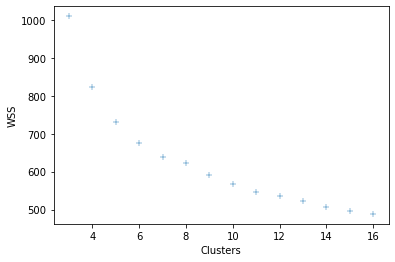

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker = '+')